# Peter McMaster
### Exercise 5.2.3 Text Data NLP from github.com/adashofdata
https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/pickle/dtm.pkl

https://www.youtube.com/watch?v=VraAbgAoYSk&ab_channel=ADashofData

Objective: Perform EDA for NLP on a Dataset of Stand-Up Comedy transcriptions
1. Most Common Words - find these and create word clouds
2. Size of vocabulary - number of unique words and also how quickly someone speaks
3. Amount of profanity - most common terms

In [1]:
import pandas as pd

In [2]:
# Downloaded from https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/pickle/dtm.pkl
data = pd.read_pickle('dtm.pkl')

In [3]:
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [4]:
data.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [5]:
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
data.index

Index(['aaaaah', 'aaaaahhhhhhh', 'aaaaauuugghhhhhh', 'aaaahhhhh', 'aaah',
       'aah', 'abc', 'abcs', 'ability', 'abject',
       ...
       'zee', 'zen', 'zeppelin', 'zero', 'zillion', 'zombie', 'zombies',
       'zoning', 'zoo', 'éclair'],
      dtype='object', length=7484)

In [7]:
data[data.columns[0]].sort_values(ascending=False).head(30).index

Index(['like', 'im', 'know', 'just', 'dont', 'shit', 'thats', 'youre', 'gonna',
       'ok', 'lot', 'gotta', 'oh', 'wanna', 'husband', 'got', 'time', 'right',
       'cause', 'women', 'day', 'people', 'pregnant', 'hes', 'need', 'god',
       'yeah', 'tell', 'theyre', 'dude'],
      dtype='object')

In [8]:
data[data.columns[0]].sort_values(ascending=False).head(30).values

array([126,  74,  65,  64,  61,  34,  34,  31,  28,  26,  24,  21,  21,
        21,  20,  19,  19,  19,  18,  17,  17,  16,  15,  14,  14,  14,
        13,  13,  12,  12])

In [9]:
# Top 30 words said for each comedian

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('did', 16),
  ('good', 16),
  ('okay', 15),
  ('gonna', 15),
  ('ive', 15),
  ('baby', 15)],
 

In [10]:
# print top 15 words said by each comedian

for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, think, tha

In [11]:
# create stop words list for better word clouds later

# Look at most common top words --> add the to stop word list

from collections import Counter

words = []
for comedian in data.columns:
    top = [word for (word,count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'school',
 'jokes',
 'yeah',
 'did',
 'good',
 'okay',
 'gonna',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'think',
 'love',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'said',
 'people',
 'fucki

In [12]:
# count the totals
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [13]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [14]:
# IM MISSING A FEW THINGS HERE>...
# returning later...

# Update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned Data
data_clean = pd.read_pickle('data_clean.pkl')

# Add Stop Words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [15]:
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

In [16]:
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [18]:
# Word Clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white",
               max_font_size=150, random_state=42)

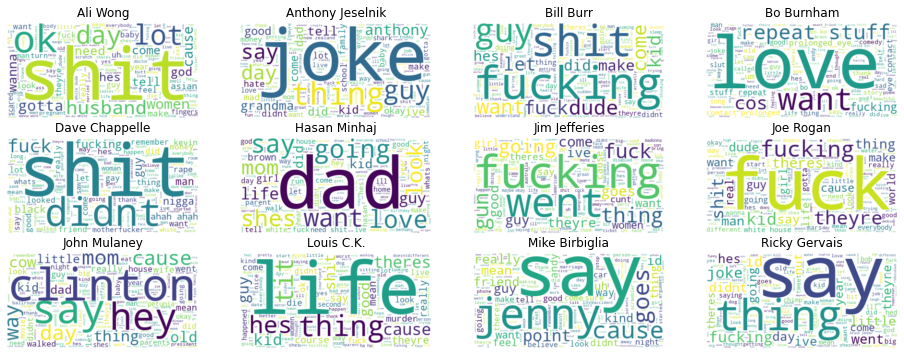

In [24]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

## 1.3 Number of Words
##### Vocabulary

In [27]:
#1.3.1 Analysis

# Find the number of unique words

# Identify the non-zero items in the document-term matrix
unique_list = []
for comedian in data.columns:
    uniques_series = pd.Series
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
# Create a new DataFrame that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,984
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1391
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [30]:
# Calculate Words Per Minute

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,984,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1391,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


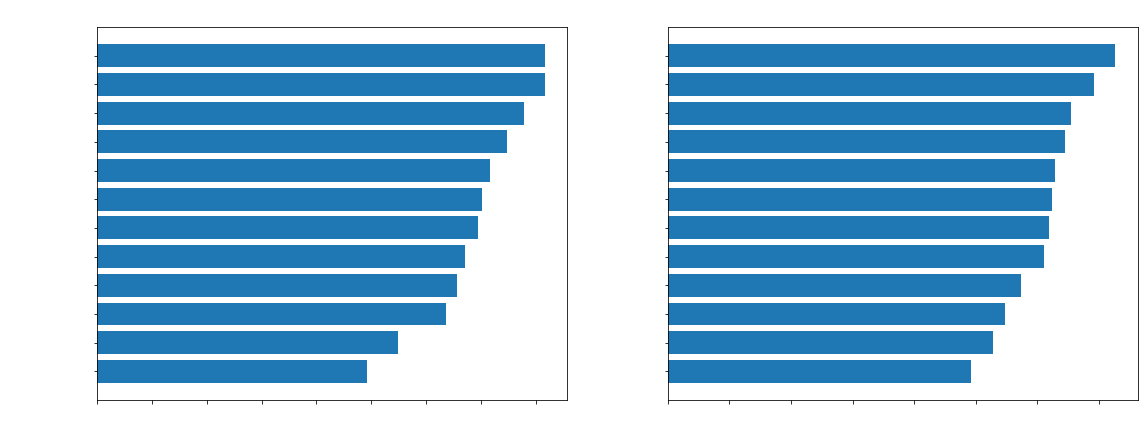

In [37]:
# Some Plots

import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian, color="white")
plt.xticks(color="white")
plt.title('Number of Unique Words', fontsize=20, color="white")

plt.subplot(1,2,2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian, color="white")
plt.xticks(color="white")
plt.title('Number of Words Per Minute', fontsize=20, color="white")

plt.tight_layout()

In [38]:
# Profanity

Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [44]:
# isolate profanity
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,9
bill,70,36,63
bo,22,15,6
dave,32,33,45
hasan,8,16,15
jim,78,37,20
joe,69,66,40
john,2,2,6
louis,6,15,25


In [47]:
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


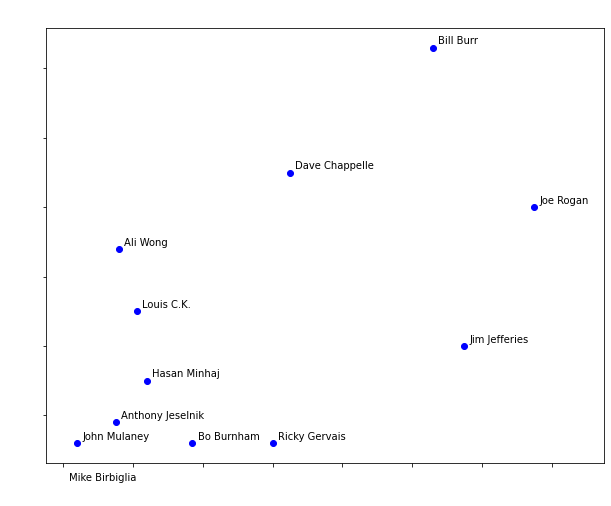

In [51]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20, color="white")
plt.xlabel('Number of F-Bombs', fontsize=15, color="white")
plt.xticks(color="white")
plt.ylabel('Number of S-Bombs', fontsize=15, color="white")
plt.yticks(color="white")

plt.show()